In [275]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error    
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
df = pd.read_csv('bmw.csv')

In [80]:
#heading of dataset
df.head(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [81]:
#info of dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [82]:
#check discribe
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [83]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [162]:
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [195]:
df_col = df.columns.tolist()

def value_c(columns):
    for col in columns:
        c = df[col].value_counts(ascending=True)
        print(f'{col} ---- Count {c}\n')

value_c(df_col)

Model ---- Count Model
M3          4413
M5          4478
X6          4478
X5          4487
X3          4497
X1          4570
5 Series    4592
3 Series    4595
i8          4606
i3          4618
7 Series    4666
Name: count, dtype: int64

Year ---- Count Year
2020    3205
2023    3219
2011    3278
2018    3278
2017    3290
2013    3326
2010    3330
2012    3332
2014    3350
2015    3358
2016    3365
2021    3372
2019    3392
2024    3427
2022    3478
Name: count, dtype: int64

Region ---- Count Region
South America    8251
Africa           8253
Europe           8334
North America    8335
Middle East      8373
Asia             8454
Name: count, dtype: int64

Color ---- Count Color
Blue      8262
Black     8273
White     8304
Grey      8348
Silver    8350
Red       8463
Name: count, dtype: int64

Fuel_Type ---- Count Fuel_Type
Diesel      12263
Electric    12471
Petrol      12550
Hybrid      12716
Name: count, dtype: int64

Transmission ---- Count Transmission
Automatic    24846
Manual    

In [174]:
df['Model'].value_counts(ascending=True)

Model
M3          4413
M5          4478
X6          4478
X5          4487
X3          4497
X1          4570
5 Series    4592
3 Series    4595
i8          4606
i3          4618
7 Series    4666
Name: count, dtype: int64

In [155]:
#Getting list of columns == number
num_col = df.select_dtypes(include='number').columns
list_col = num_col.tolist()
list_col

['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

In [160]:
#Function for p-value and KStest (Kolmogorov-Smirnov)
def KStest(columns):
    for col in columns:
        stat, p_value = stats.kstest(df[col], 'norm')
        print(f"Статистика теста для колонки {col}: {stat}")
        print(f"P-value для колонки {col}: {p_value}")
        
        if p_value <= 0.05:
            print('Можно отвергнуть нулевую гипотезу')
        else:
            print('Подтверждение нулевой гипотезы')
            
KStest(list_col)

Статистика теста для колонки Year: 1.0
P-value для колонки Year: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Engine_Size_L: 0.9331927987311419
P-value для колонки Engine_Size_L: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Mileage_KM: 0.99998
P-value для колонки Mileage_KM: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Price_USD: 1.0
P-value для колонки Price_USD: 0.0
Можно отвергнуть нулевую гипотезу
Статистика теста для колонки Sales_Volume: 1.0
P-value для колонки Sales_Volume: 0.0
Можно отвергнуть нулевую гипотезу


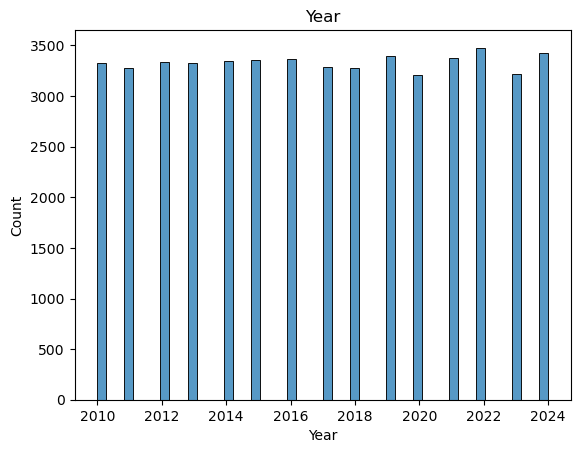

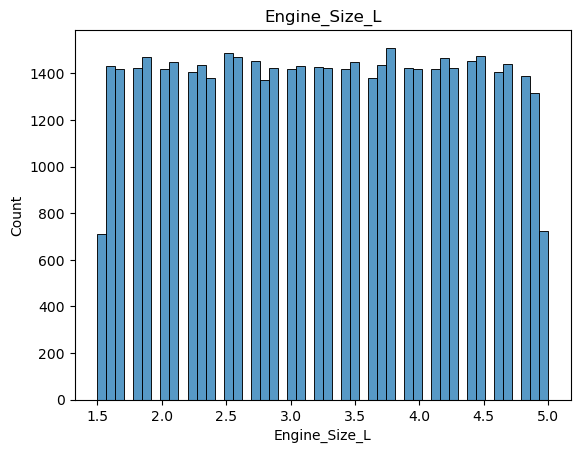

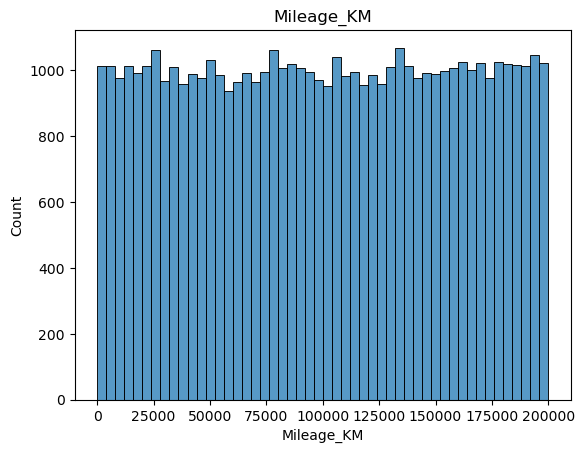

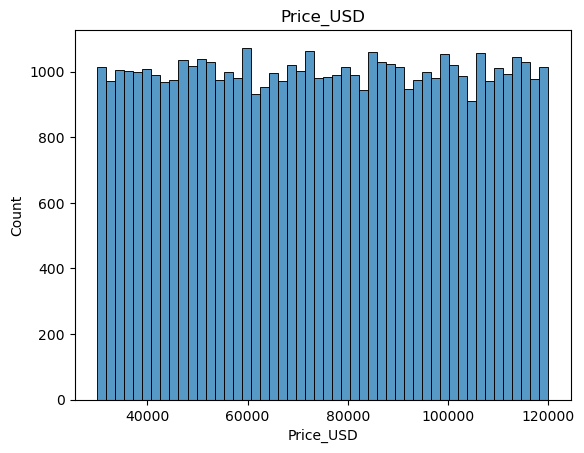

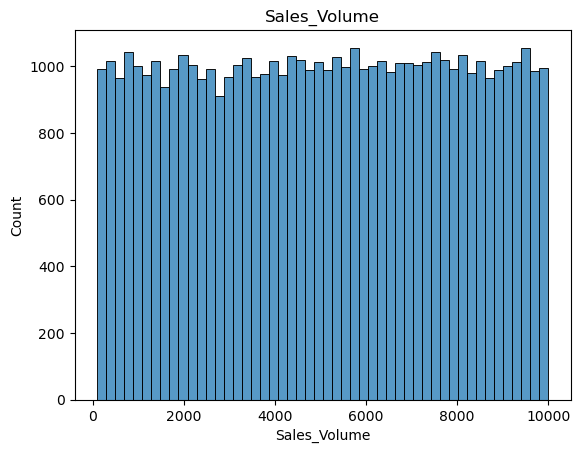

In [161]:
#Make histogram of data distribution
def makeHist(columns):
    for col in columns:
        sns.histplot(data=df, x=col, bins=50)
        plt.title(col)
        plt.show()

makeHist(list_col)

In [232]:
#Function for z-score
def z_score(columns):
    for col in columns:
        z = stats.zscore(df[col])
        z_std = z.std()
        z_min = z.min()
        z_max = z.max()
        z_median = z.median()
        print(f"median of z-score for {col}: z_median = {z_median}, z_std = {z_std}, z_min = {z_min}, z_max = {z_max}")
            
z_score(list_col)

median of z-score for Year: z_median = -0.0036305480547929366, z_std = 1.000010000150062, z_min = -1.6223462412823755, z_max = 1.6150851451727894
median of z-score for Engine_Size_L: z_median = -0.04675600223138495, z_std = 1.0000100001500567, z_min = -1.7314784226076976, z_max = 1.7370677369905927
median of z-score for Mileage_KM: z_median = 0.0014030989855441647, z_std = 1.000010000150007, z_min = -1.7311458975358458, z_max = 1.7205246272043044
median of z-score for Price_USD: z_median = -0.0008885648844107589, z_std = 1.000010000150007, z_min = -1.7322340230547146, z_max = 1.7294952804435249
median of z-score for Sales_Volume: z_median = 0.006820827180499176, z_std = 1.000010000150012, z_min = -1.7388761975103855, z_max = 1.726264136841944


In [234]:
cat_col = df.select_dtypes(include='object').columns
list_col_cat = cat_col.tolist()
list_col_cat

['Model',
 'Region',
 'Color',
 'Fuel_Type',
 'Transmission',
 'Sales_Classification']

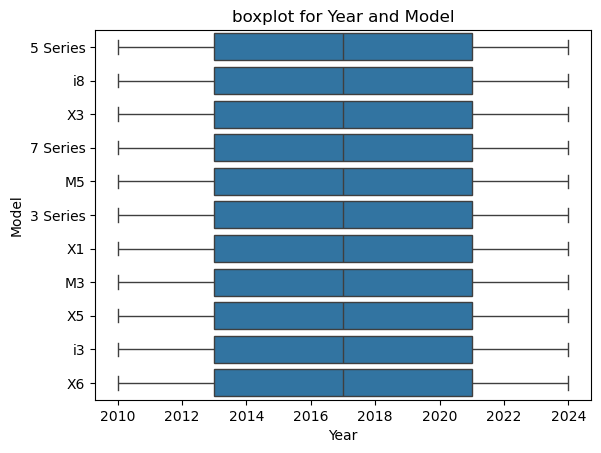

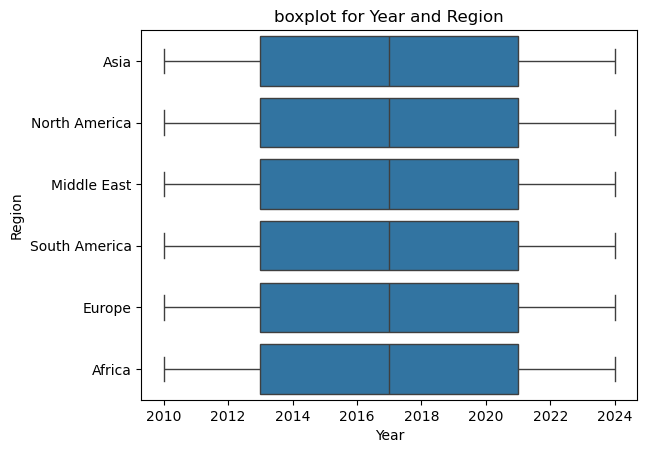

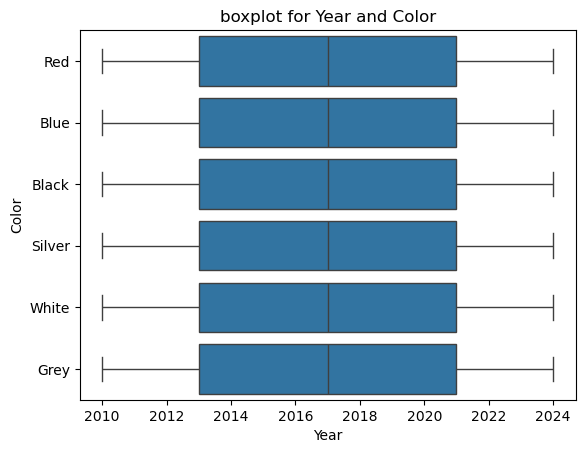

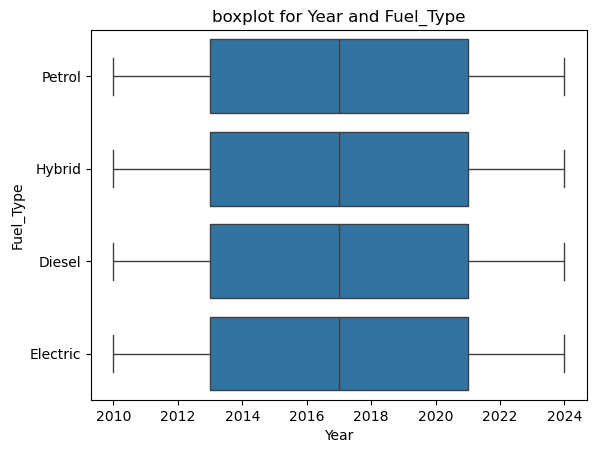

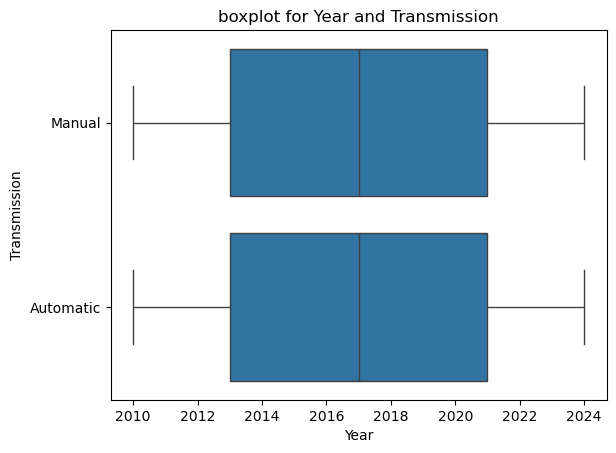

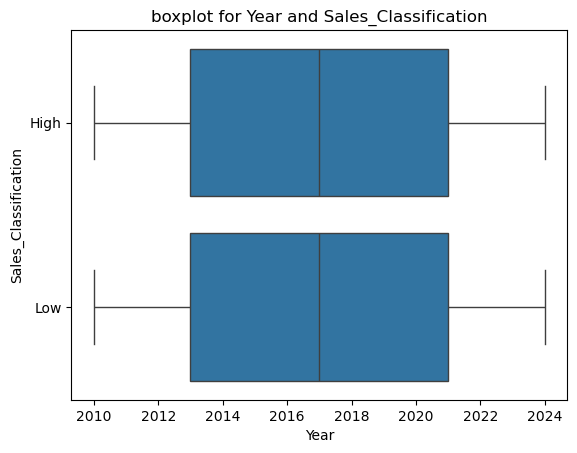

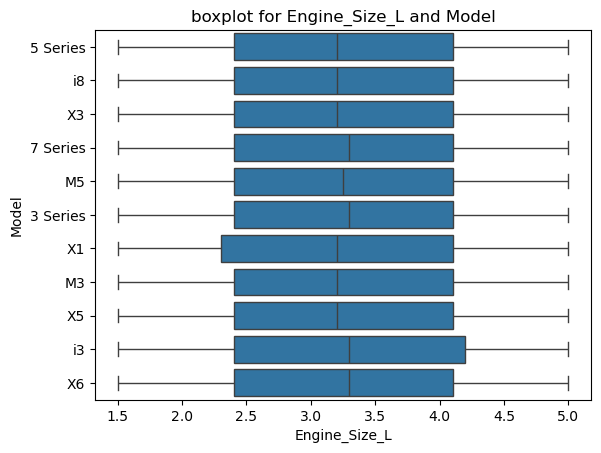

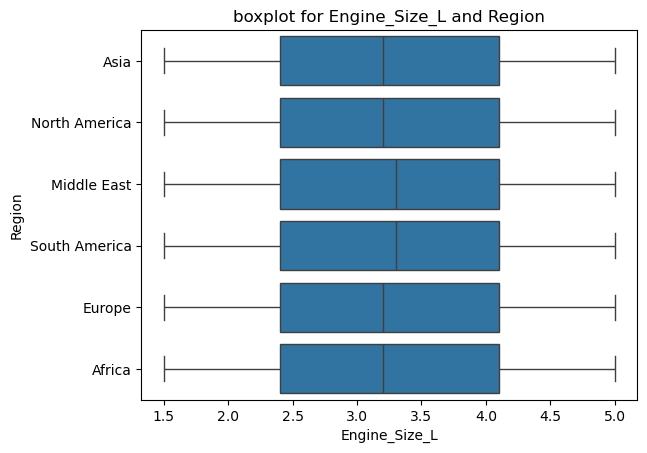

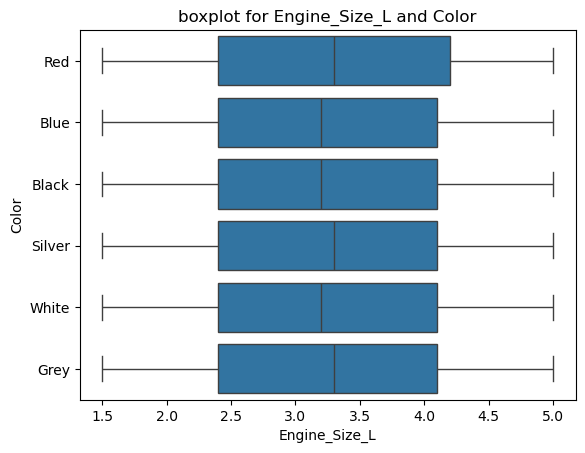

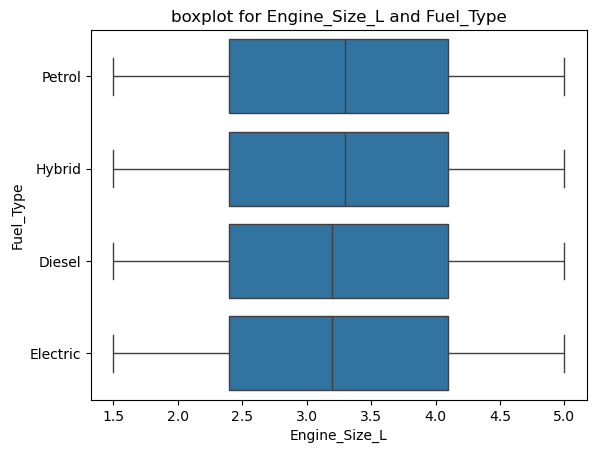

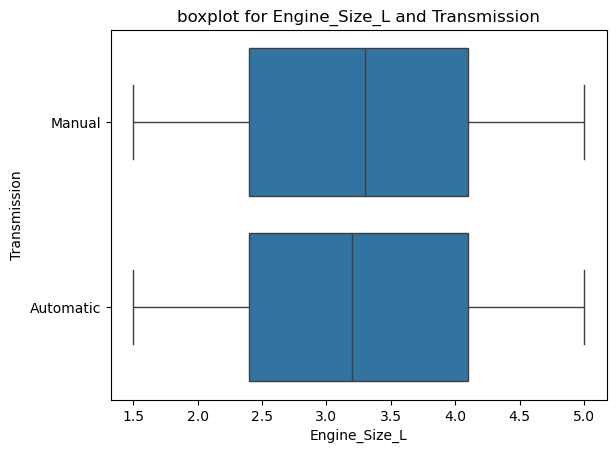

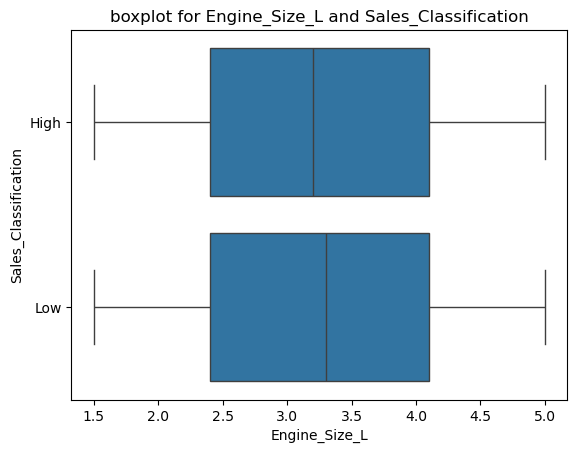

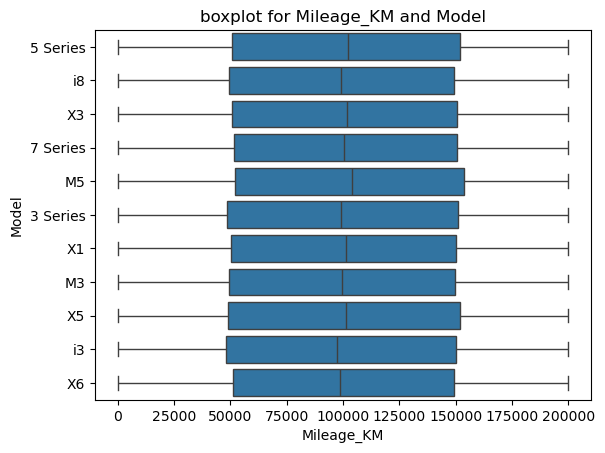

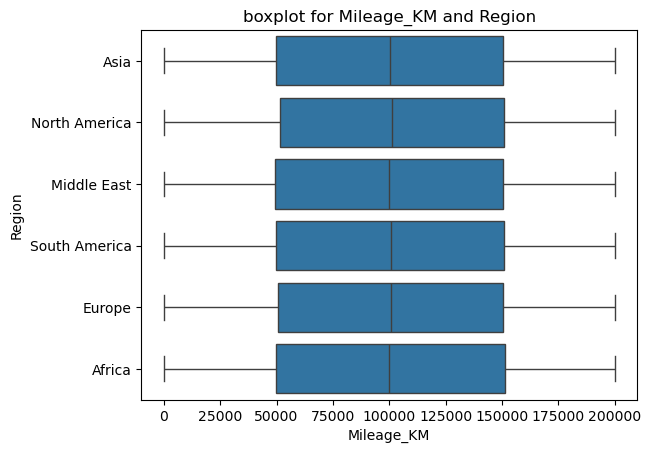

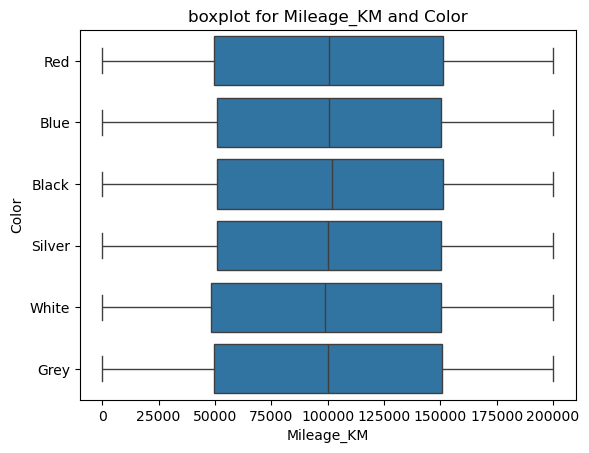

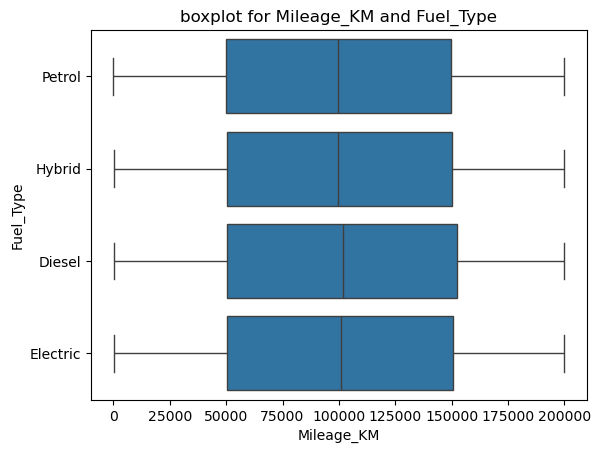

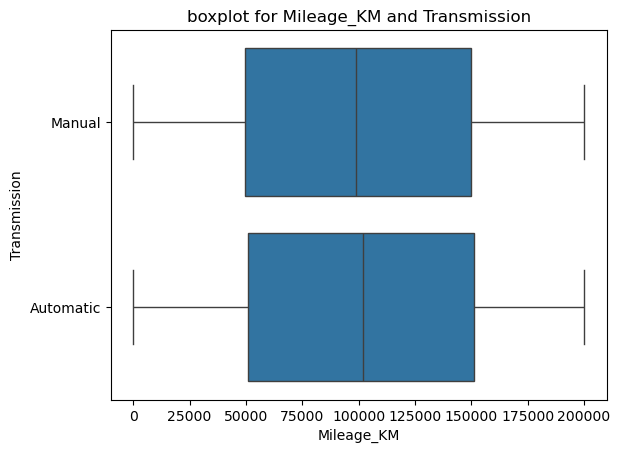

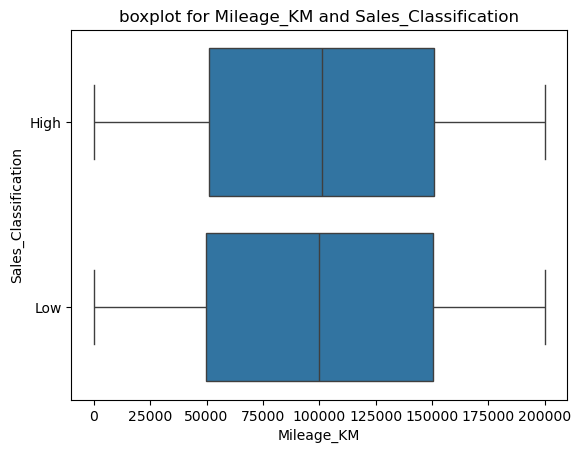

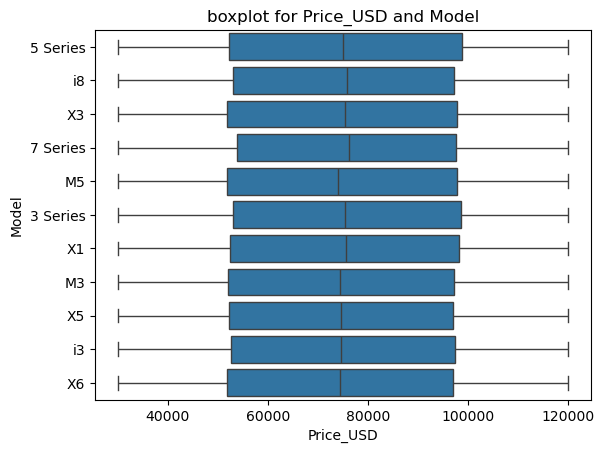

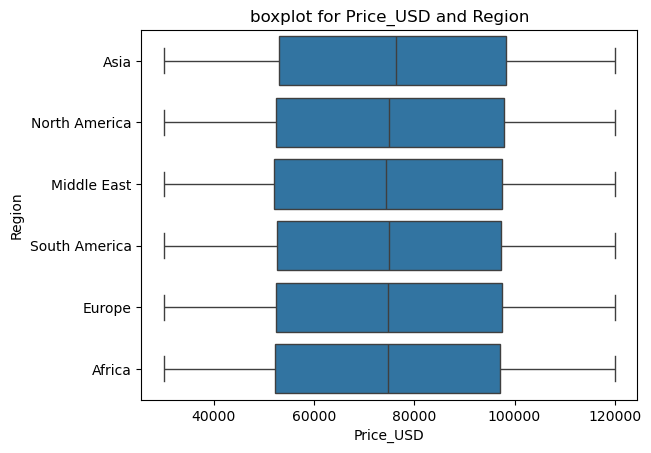

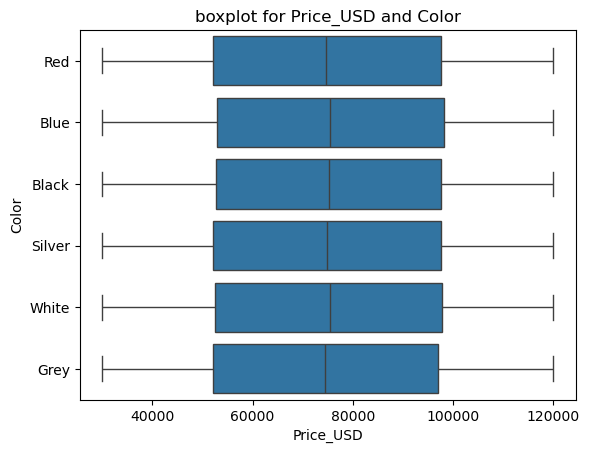

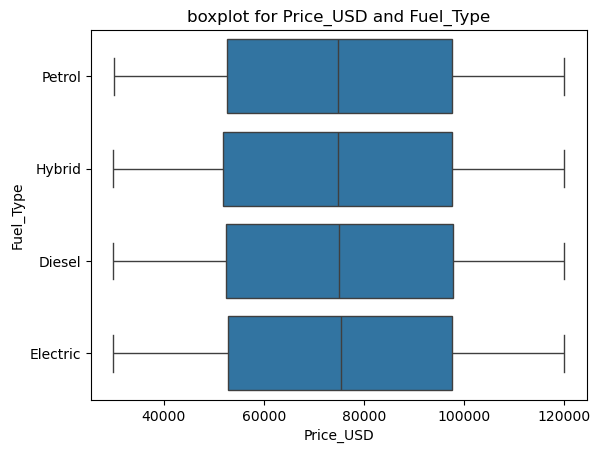

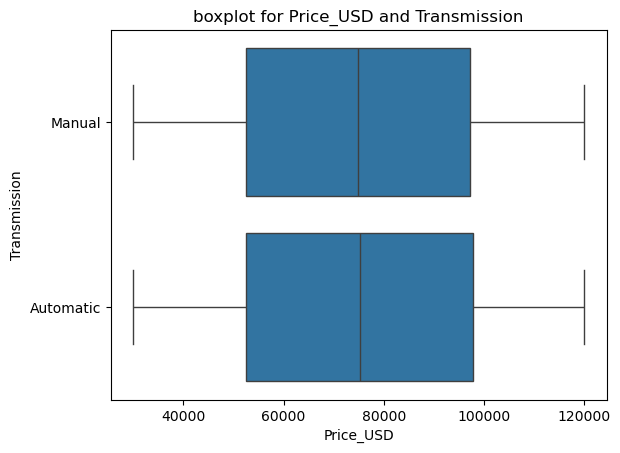

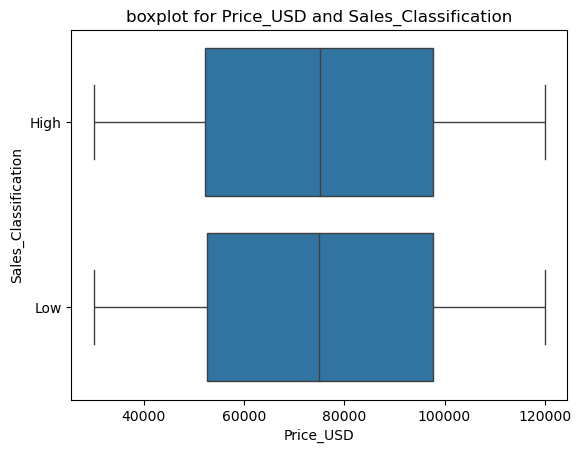

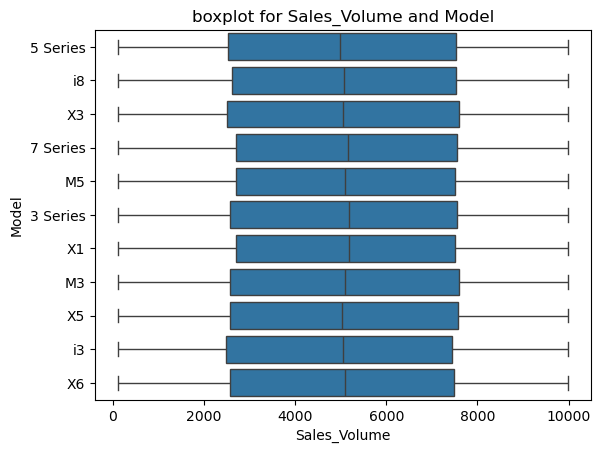

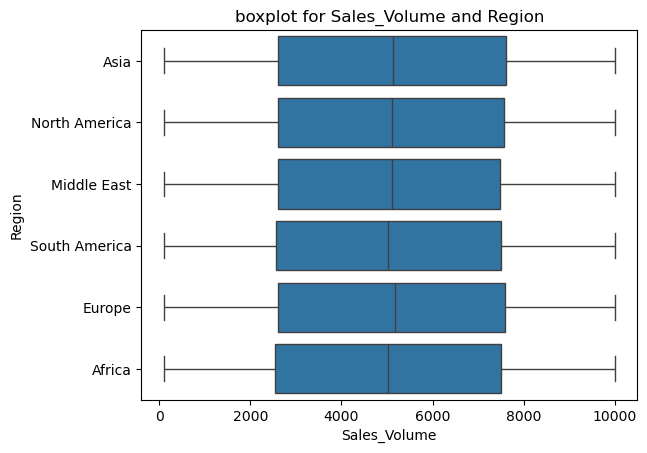

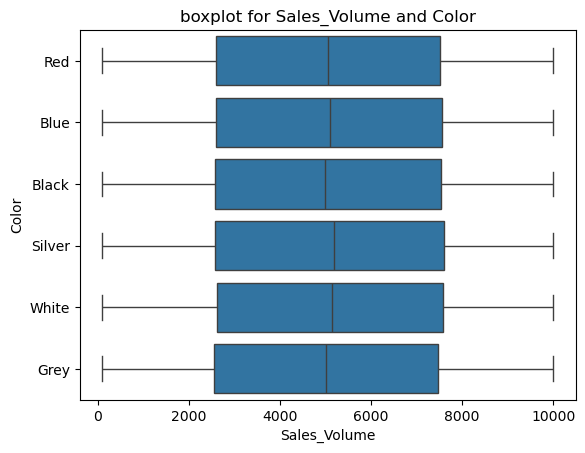

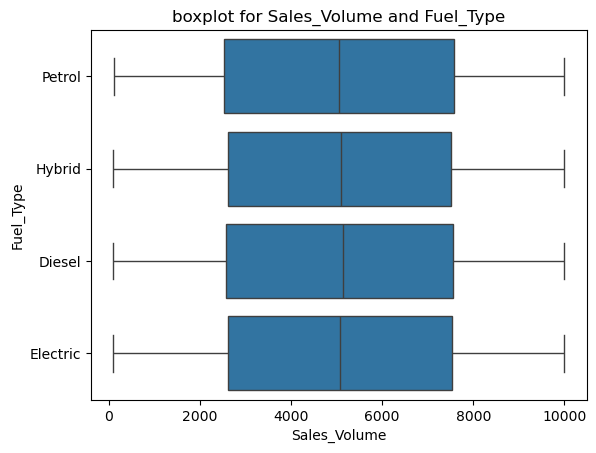

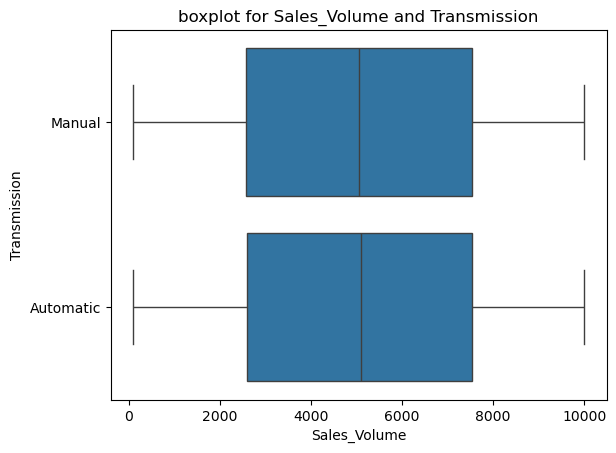

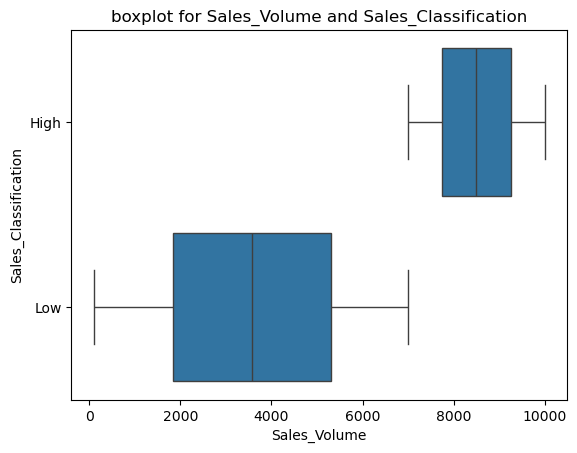

In [235]:
#boxplot for numeric columns/categorial columns
def makeBoxPlot(num_columns, cat_columns):
    for num in num_columns:
        for cat in cat_columns:
            sns.boxplot(data=df, x=num, y=cat)
            plt.title(f'boxplot for {num} and {cat}')
            plt.show()

makeBoxPlot(list_col, list_col_cat)

In [279]:
#ohe = OneHotEncoder()
#encoded_array = ohe.fit_transform(df[cat_col])
#new_column_names = ohe.get_feature_names_out(cat_col)
#encoded_df = pd.DataFrame(encoded_array.toarray(), columns=new_column_names)
#concat_cat = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
#concat_cat.drop(['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification'], axis=1, inplace=True)

In [302]:
le = LabelEncoder()

def le_encoder(categoty_column):
    for col in categoty_column:
        df[col] = le.fit_transform(df[col])
le_encoder(cat_col)

In [312]:
#feature engineering
df['Number_of_Years'] = 2025 - df['Year']
df['Total_price'] = df['Price_USD'] * df['Sales_Volume']
df['Price_per_1_MileageKM'] = df['Price_USD'] / df['Mileage_KM']
df['MileageKM_per_1_year'] = (df['Mileage_KM'] / df['Number_of_Years']).round(2)

In [314]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Number_of_Years,Total_price,Price_per_1_MileageKM,MileageKM_per_1_year
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0,9,819542000,0.650684,16860.89
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1,12,271562732,0.651092,10139.25
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1,3,792175410,10.305250,3663.67
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1,1,246749637,2.237057,27255.00
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1,5,153685840,0.408561,24426.20


In [315]:
df.corr(method='spearman')

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Number_of_Years,Total_price,Price_per_1_MileageKM,MileageKM_per_1_year
Model,1.000000,-0.003112,0.000282,-0.008893,0.001288,0.003888,-0.001280,-0.009245,-0.006738,-0.001363,0.002288,0.003112,-0.003792,0.004891,-0.009546
Year,-0.003112,1.000000,0.003126,-0.005900,0.000242,0.005116,-0.001970,0.008734,0.003556,0.001687,-0.005404,-1.000000,0.003217,-0.007971,0.638514
Region,0.000282,0.003126,1.000000,0.007502,-0.001513,0.005949,0.001494,-0.000098,-0.002451,-0.000727,0.001041,-0.003126,-0.001872,-0.004027,0.003785
Color,-0.008893,-0.005900,0.007502,1.000000,-0.004982,-0.001306,0.007314,-0.006721,0.001546,0.006104,-0.005230,0.005900,0.006888,0.007246,-0.009579
Fuel_Type,0.001288,0.000242,-0.001513,-0.004982,1.000000,0.001275,0.004036,-0.007523,-0.003259,-0.004207,0.001578,-0.000242,-0.005091,0.005782,-0.004143
Transmission,0.003888,0.005116,0.005949,-0.001306,0.001275,1.000000,0.001385,-0.013464,-0.005230,-0.001496,0.001647,-0.005116,-0.002203,0.010321,-0.005632
Engine_Size_L,-0.001280,-0.001970,0.001494,0.007314,0.004036,0.001385,1.000000,-0.004901,0.000154,-0.003928,0.001785,0.001970,-0.003482,0.004636,-0.008374
Mileage_KM,-0.009245,0.008734,-0.000098,-0.006721,-0.007523,-0.013464,-0.004901,1.000000,-0.004241,0.001418,-0.006556,-0.008734,-0.001883,-0.860416,0.707880
Price_USD,-0.006738,0.003556,-0.002451,0.001546,-0.003259,-0.005230,0.000154,-0.004241,1.000000,0.000044,0.001730,-0.003556,0.465361,0.453218,0.001595
Sales_Volume,-0.001363,0.001687,-0.000727,0.006104,-0.004207,-0.001496,-0.003928,0.001418,0.000044,1.000000,-0.797390,-0.001687,0.851636,-0.001402,0.002690


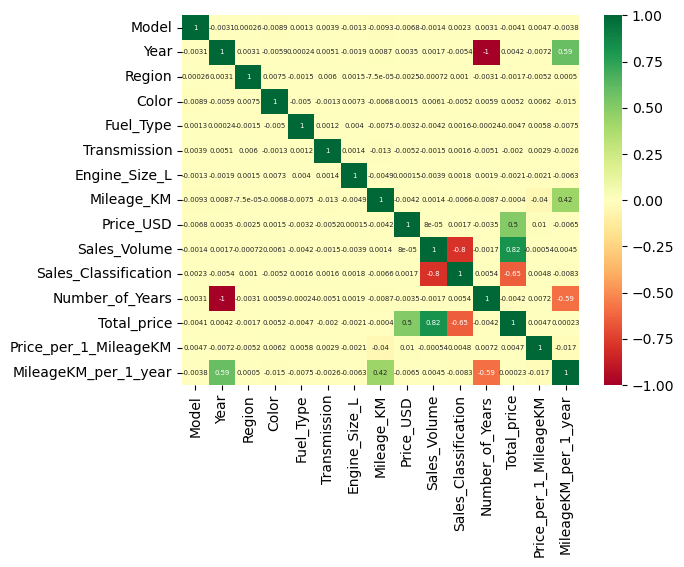

In [316]:
correlation_matrix = df.corr()
annot_kws = {"size": 5}
sns.heatmap(correlation_matrix, cmap = 'RdYlGn', annot = True, annot_kws=annot_kws)
plt.show()

#### df_cat = df.select_dtypes(include='object')
df_cat_column = df_cat.columns.to_list()
colors = sns.color_palette('bright')

In [54]:
data = df.copy()

In [72]:
#transform data from pipeline
simple_imputer = SimpleImputer(strategy='median')
ohe = OneHotEncoder()
std_scaler = StandardScaler()
xgb_reg = GradientBoostingRegressor()

In [71]:
pipe_numeric = Pipeline([('scaler', std_scaler), ('imputer', simple_imputer)])

In [ ]:
pipe_categorial = Pipeline()

SyntaxError: invalid syntax (3672265088.py, line 1)